In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [19]:
def sin(x, T=100):
    return np.sin(2.0 * np.pi * x / T) #+ np.sin(1.0 * np.pi * x / 3.0 / T) 

def toy_problem(T=100, ampl=0.2, n=100):
    x = np.arange(0, 2 * n + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return sin(x, T) + noise

prices = toy_problem()

In [20]:
prices = prices.reshape([-1, 1])

In [21]:
split_pos = 10
train = prices[:-split_pos]
test = prices[-split_pos:]

In [22]:
def make_dataset(raw_data, duration):
    len_data = raw_data.shape[0]
    dim_data = raw_data.shape[1]
    data_list = []
    target_list =  []
    for i in range(len_data - duration):
        data_list.append(raw_data[i:i+duration])
        target_list.append(raw_data[i+duration])
        
    data = np.array(data_list).reshape([-1,  duration, dim_data])
    target = np.array(target_list).reshape(-1, dim_data)
    
    return data, target

In [23]:
def make_model(X, n_hidden=300):
    len_seq = X.shape[1]
    len_out = X.shape[2]

    model = Sequential()
    model.add(LSTM(n_hidden, batch_input_shape=(None, len_seq, len_out), return_sequences=False))
    model.add(Dense(len_out))
    model.add(Activation("linear"))
    optimizer = Adam(lr=0.001)
    model.compile(loss="mean_squared_error", optimizer=optimizer)
    
    return model

def fit_model(model, X, y):
    early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=10)
    model.fit(X, y, batch_size=30, epochs=100, validation_split=0.1, callbacks=[early_stopping])
    return model

In [24]:
def predict_future(X_train, model, len_future=20):
    x = X_train[-1, :, :]
    duration = X_train.shape[1]
    dim = X_train.shape[2]
    pred_list = []
    for _ in range(len_future):
        pred_ = model.predict(x.reshape([1, duration, dim]))
        pred_list.append(pred_)
        x = np.vstack([x[1:], pred_])
        pred_feature = np.array(pred_list).reshape([-1, dim])
    return pred_feature

In [25]:
model_list = []
duration_list = [30, 30, 30, 30]
pred_list = []
future_list = []
for duration in duration_list:
    X_train, y_train = make_dataset(train, duration)
    model = make_model(X_train, n_hidden=50)
    model.summary()
    model = fit_model(model, X_train, y_train)
    future = predict_future(X_train, model, len_future=300)
    
    model_list.append(model)
    pred_list.append(model.predict(X_train))
    future_list.append(future)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
_________________________________________________________________
activation_9 (Activation)    (None, 1)                 0         
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
Train on 144 samples, validate on 17 samples
Epoch 1/100
144/144 [==============================] - 1s 10ms/step - loss: 0.3955 - val_loss: 0.4500
Epoch 2/100
144/144 [==============================] - 0s 752us/step - loss: 0.2695 - val_loss: 0.2286
Epoch 3/100
144/144 [==============================] - 0s 733us/step - loss: 0.1629 - val_loss: 0.0665
Epoch 4/100
144/144 [============================

144/144 [==============================] - 0s 720us/step - loss: 0.0150 - val_loss: 0.0177
Epoch 73/100
144/144 [==============================] - 0s 860us/step - loss: 0.0149 - val_loss: 0.0178
Epoch 74/100
144/144 [==============================] - 0s 706us/step - loss: 0.0149 - val_loss: 0.0178
Epoch 75/100
144/144 [==============================] - 0s 917us/step - loss: 0.0149 - val_loss: 0.0179
Epoch 76/100
144/144 [==============================] - 0s 868us/step - loss: 0.0154 - val_loss: 0.0177
Epoch 77/100
144/144 [==============================] - 0s 907us/step - loss: 0.0151 - val_loss: 0.0178
Epoch 78/100
144/144 [==============================] - 0s 890us/step - loss: 0.0155 - val_loss: 0.0178
Epoch 79/100
144/144 [==============================] - 0s 912us/step - loss: 0.0148 - val_loss: 0.0178
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 50)          

144/144 [==============================] - 0s 760us/step - loss: 0.0164 - val_loss: 0.0176
Epoch 18/100
144/144 [==============================] - 0s 902us/step - loss: 0.0161 - val_loss: 0.0172
Epoch 19/100
144/144 [==============================] - 0s 906us/step - loss: 0.0160 - val_loss: 0.0172
Epoch 20/100
144/144 [==============================] - 0s 887us/step - loss: 0.0164 - val_loss: 0.0173
Epoch 21/100
144/144 [==============================] - 0s 925us/step - loss: 0.0159 - val_loss: 0.0174
Epoch 22/100
144/144 [==============================] - 0s 892us/step - loss: 0.0162 - val_loss: 0.0172
Epoch 23/100
144/144 [==============================] - 0s 889us/step - loss: 0.0158 - val_loss: 0.0172
Epoch 24/100
144/144 [==============================] - 0s 861us/step - loss: 0.0159 - val_loss: 0.0176
Epoch 25/100
144/144 [==============================] - 0s 881us/step - loss: 0.0159 - val_loss: 0.0172
Epoch 26/100
144/144 [==============================] - 0s 908us/step - loss:

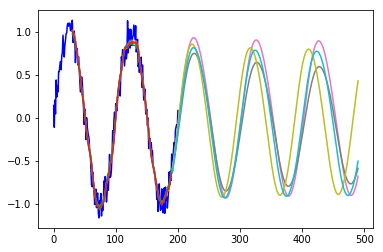

In [26]:
plt.figure()
plt.plot(range(0, len(prices)), prices[:,0], color='b', label='raw_data')

cmap = plt.get_cmap("tab10")
for i, pred, duration, model, future  in zip(range(len(pred_list)), pred_list, duration_list, model_list, future_list):
    plt.plot(range(duration, len(pred)+duration), pred[:,0], color=cmap(i), label='predicted_{}'.format(duration))
    plt.plot(range(len(pred)+duration, len(pred)+duration+len(future)), future[:,0], color=cmap(i+6), label='predicted_future_{}'.format(duration))

# plt.ylim(0.92, 0.97)
#plt.xlim(3500, 4000)
#plt.legend()    
plt.show()